<a href="https://colab.research.google.com/github/Neamalinga/machine-learning-projects/blob/main/MULTI_MODEL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_sas(r'/content/drive/MyDrive/machine learning datasets/health.sas7bdat')

In [ ]:
df.head()

,X1,X2,X3,X4,X5,x6
0,64.9,78.0,284.0,9.1,109.0,28.0
1,70.3,68.0,433.0,8.7,144.0,29.0
2,60.8,70.0,739.0,7.2,113.0,27.0
3,72.5,25.0,250.0,2.5,34.0,23.0
4,76.7,74.0,477.0,8.3,206.0,21.0


/tmp/ipython-input-1062669359.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['X1'])


<Axes: xlabel='X1', ylabel='Density'>

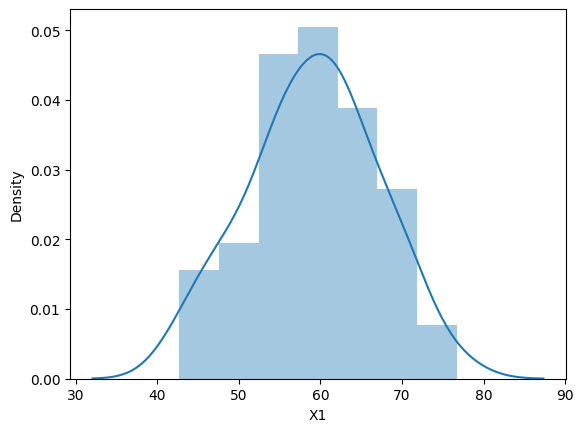

In [ ]:
sns.distplot(df['X1'])

In [ ]:
df['X1'].skew()

np.float64(-0.08931648529949646)

In [ ]:
np.log(df['X1']).skew()

np.float64(-0.3988804242280352)

In [ ]:
np.sqrt(df['X1']).skew()

np.float64(-0.24395382705904806)

In [ ]:
#what is the mathematical equation between death rate and other variables
# X1=DEATH RATE PER 1000 RESIDENTS
# X2=DOCTOR AVALIABILITY PER 100,000 RESIDENTS
# X3=HOSPITAL AVALIABLITY PER 100000 RESIDENTS
# X4=ANNUAL PER CAPITA INCOME IN THOUSANDS OF DOLLARS
# X5=POPULATION DENSITY PEOPLE PER SQUARE MILE
# X6=NUMBER OF CARS PER 500


In [ ]:
y=['X1']
X=['X2','X3','X4','X5','x6']
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(df[X],df[y])


LinearRegression()

In [ ]:
df['X1_PRED'] = model.predict(df[X]).flatten()

In [ ]:
df=df.drop(columns=['Y_PRED'])

In [ ]:
df.head()

,X1,X2,X3,X4,X5,x6,X1_PRED
0,64.9,78.0,284.0,9.1,109.0,28.0,66.391854
1,70.3,68.0,433.0,8.7,144.0,29.0,69.631724
2,60.8,70.0,739.0,7.2,113.0,27.0,64.289944
3,72.5,25.0,250.0,2.5,34.0,23.0,71.745451
4,76.7,74.0,477.0,8.3,206.0,21.0,74.697098


In [ ]:
print(model.intercept_)

[75.44899779]


In [ ]:
print(model.coef_)


[[-0.10249285 -0.01175745 -1.0950145   0.099386    0.05028477]]


In [ ]:
SSE = ((df['X1'] - df['X1_PRED'])**2).sum()
print(f"Sum of Squared Errors (SSE): {SSE}")

Sum of Squared Errors (SSE): 149.83027085944508


In [ ]:
SST=((df['X1']-df['X1'].mean())**2).sum()
print(f"Sum of Squared Regression (SST): {SST}")


Sum of Squared Regression (SST): 3196.1501375845323


In [ ]:
SST=SSR-SSE

In [ ]:
SST

np.float64(3046.319866725087)

In [ ]:
r_squared = SST / SSR
print(f"R-squared: {r_squared}")

R-squared: 0.9531216418473137


In [ ]:
# R_SQUARED IS 95% THAT MEANS 95% OF THE MODEL IS EXPLAINED BY THE MODEL

In [ ]:
#WHAT ARE THE COEFFICIENTS ARE THEY INTITUTVELY CORRECT
#  X1=DEATH RATE PER 1000 RESIDENTS
# X2=DOCTOR AVALIABILITY PER 100,000 RESIDENTS
# X3=HOSPITAL AVALIABLITY PER 100000 RESIDENTS
# X4=ANNUAL PER CAPITA INCOME IN THOUSANDS OF DOLLARS
# X5=POPULATION DENSITY PEOPLE PER SQUARE MILE
# X6=NUMBER OF CARS PER 500


In [ ]:
model.intercept_

array([75.44899779])

In [ ]:
model.coef_

array([[-0.10249285, -0.01175745, -1.0950145 ,  0.099386  ,  0.05028477]])

x2=-0.101  for every 1 unit increase in the doctor availabilty the death rate is going to decrease by -0.101
x3=-0.011 for every  1 unit increase in the hospital availabiity the death rate is going to decrease by -0.011
x4=-1.09 for 1 unit increase in the annual percapital income the death rate is going to decrease by -1.09
x5=0.09 for every increase in the population density the death rate is going to be increase by 0.099
x6=0.05 for increase in the no of cars the death rate is going to increase by 0.05



In [ ]:
# For a city: Doctor availability per 100,000 residents is 112,
# Hospital availability per 100,000 residents is 316,
# Annual per capita income in thousands of dollars is 10.39,
# Population density people per square mile is 106.
# What is the expected death rate?


In [54]:
Death_Rate = 75.44 + (-0.102 * 112) + (-0.0118 * 316) + (-1.09 * 10.39) + (0.0993* 106)

In [55]:
Death_Rate

59.487899999999996

In [ ]:
# What happens to death rate when doctor availability increases?
# THE DEATH RATE DECREASES WHEN THE DOCTOR AVAILABILITY INCREASES